<a href="https://colab.research.google.com/github/jeong2624/Deep-Learning-for-the-Life-Sciences-coding-transcription/blob/main/Chapter4_Handling_molecular_level_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Handling molecular-level data**

해당 Chapter에서는 머신러닝을 분자 수준의 데이터에 적용하는 방법을 다룸.

분자 수준의 데이터에 머신러닝을 사용하는 것은 재료과학과 화학 분야에서 특히 유용함.

이로 인해 새로운 분자 구조를 예측할 수 있다면 전체 실험의 양을 크게 줄일 수 있으며, 무작위로 설정하는 대신에 머신러닝 모델로부터 제안된 분자를 사용해 실험함으로써 성공 가능성을 높일 수 있음.

In [1]:
# 필요한 라이브러리 설치
!pip install --pre deepchem
!pip install numpy torch_geometric pytorch_lightning dm-haiku

In [2]:
# 필요한 라이브러리 불러오기
import deepchem as dc
from rdkit import Chem
import numpy as np

# 재현성을 위해 시드값 배정
np.random.seed(20231106)

### **1. 분자 데이터 피처화**

실제로 분자 데이터를 머신러닝 모델에 입력하기 위해서는 해당 데이터를 피쳐 데이터로 변환하는 과정이 필요함.
***

#### (1) 확장 연결 지문 (Extended-Connectivity FingerPrint)

화학 지문 (Chemical fingerprint)은 분자의 특성 유무를 1과 0으로 나타낸 백터

확장 연결 지문 (ECFP)은 화학 지문의 몇 가지 유용한 특성을 결합한 피쳐화 방법으로 임의의 크기를 고정 길이의 벡터로 변환


<font color=red>📌 **ECFC 장점 :**</font>
1. 대부분 머신러닝 모델은 입력값으로 동일한 크기의 벡터를 사용해야 하므로 ECFC는 서로 다른 크기의 분자를 갖고 동일한 학습 모델을 사용할 수 있음.
2. ECFC로 변환하면 서로 비교하기 쉽다. (두 개의 분자에 대해 일치한 벡터 값들이 많을 수록 분자가 유사하다고 간주)
3. ECFC는 계산을 빠르게 할 수 있음.

<font color=red>📌 **ECFC 단점 :**</font>
분자에 대한 많은 정보를 담고 있지만 일부 정보는 손실될 수 있다.

  (ex) 두 개의 다른 분자가 똑같은 화학 지문을 가질 수 있기 때문에 화학 지문만 주어지면 어떤 분자에서 왔는지를 알아내는 것은 불가능함.


**화학 지문의 각 요소는 특정 원자의 특성 유무를 나타냄.**

확장 연결 지문 피처화는 모든 원자를 독립적으로 고려해 원자의 특성, 공유 결합의 수 등을 조사.

In [3]:
# SMILES는 분자의 화학식을 문자열로 나타내는 데 널리 사용되는 방법.
smiles = ['C1CCCCC1', 'O1CCOCC1'] # cyclonhexane과 dioxane

# RDKit 라이브러리를 활용해 ECFP4 알고리즘 수행
mols = [Chem.MolFromSmiles(smile) for smile in smiles]
feat = dc.feat.CircularFingerprint(size = 1024)

# dc.feat.CircularFingerprint 클래스 상속
arr = feat.featurize(mols)
print(arr)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### (2) 분자 표현자 (Molecular descriptor)

분자 데이터 기록은 대개 분자의 구조를 설명를 설명하는 다양한 계산 값을 포함함.

(ex) 분배 계수, 극성 표면적..

분자 표현자 피처화는 상대적으로 분자의 일반적인 특성에 의존하는 것을 예측할 때 가장 잘 작동함.

하지만 원자의 상세한 배열에 의존하는 특성을 예측하는 데는 효과가 좋지 않음.

In [4]:
# RDKit 라이브러리는 분자에서 분자 표현자를 계산하는 것을 제공
feat = dc.feat.RDKitDescriptors()
arr = feat.featurize(mols)
print(arr)

[[ 1.71997309e+00  1.94969403e+00 -2.05230597e+00  2.14710000e+00
  -1.85490000e+00  4.50600000e+00  5.04000000e-01  1.40140000e+01
   1.00120000e+01  2.00000000e+00  1.55097750e+01  4.24264069e+00
   4.24264069e+00  4.24264069e+00  3.00000000e+00  3.00000000e+00
   3.00000000e+00  2.12132034e+00  2.12132034e+00  1.50000000e+00
   1.50000000e+00  1.06066017e+00  1.06066017e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  3.85249297e+01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  8.40939004e+01  3.33333333e-01
   5.00000000e-01  6.66666667e-01  1.00000000e+00  0.00000000e+00
   6.00000000e+00  7.20660000e+01  1.71997309e+00  4.16666667e+00
   2.22222222e+00  1.00000000e+00  3.95581304e+01  1.50000000e+00
   5.33059728e-02  1.50000000e+00 -5.33059728e-02  1.50000000e+00
   5.33059728e-02  1.50000000e+00 -5.33059728e-02  2.34060000e+00
   2.77020000e+01  8.41620000e+01  0.00000000e+00  0.00000000e+00
   1.00000

### **2. 용해도 예측 모델**

분자의 중요한 특성인 용해도 (solubility)를 예측하기 위해 실제 데이터셋으로 머신러닝을 해본다.

In [5]:
# 학습에 사용할 데이터셋
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer = 'GraphConv') # featurizer = 'GraphCov' : 그래프 합성곱 모델
train_dataset, valid_dataset, test_dataset = datasets

In [6]:
# 모델 생성
model = dc.models.GraphConvModel(n_tasks = 1, # 각 샘플에 대한 작업 수
                                 mode = 'regression', # 어떤 모델을 만들 것인가?
                                 dropout = 0.2 # 합성곱 계층 출력값 중 20%가 임의로 제거
                                 )

In [7]:
# 모델 학습
model.fit(train_dataset, nb_epoch = 100)

0.10630843162536621

In [8]:
# 모델 성능 평가
# 평가 지표는 피어슨 상관계수로 정의
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)

print("Training set score")
print(model.evaluate(train_dataset, [metric], transformers))

print("Test set score")
print(model.evaluate(test_dataset, [metric], transformers))

Training set score
{'pearson_r2_score': 0.9231390475897865}
Test set score
{'pearson_r2_score': 0.6241926613712173}


In [9]:
# 새로운 분자의 용해도 예측
# 무작위로 5개의 분자를 SMILES 문자열로 표현
smiles = ['COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C',
          'CCOC(=O)CC',
          'CSc1nc(NC(C)C)nc(NC(C)C)n1',
          'CC(C#C)N(C)C(=O)Nc1ccc(Cl)cc1',
          'Cc1cc2ccccc2cc1C']

In [10]:
# RDKit을 사용해 해당 SMILES 문자열을 분석한 다음
# DeepChem으로 그래프 합성곱의 입력 형식으로 변환
mols = [Chem.MolFromSmiles(s) for s in smiles]
featurizer = dc.feat.ConvMolFeaturizer()
x = featurizer.featurize(mols)

In [11]:
# 해당 5개의 분자에 대한 용해도 예측
predicted_solubility = model.predict_on_batch(x)

for m,s in zip(smiles, predicted_solubility):
    print()
    print('Molecule:', m)
    print('Predicted solubility:', s)


Molecule: COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C
Predicted solubility: [-0.8102088]

Molecule: CCOC(=O)CC
Predicted solubility: [1.6032393]

Molecule: CSc1nc(NC(C)C)nc(NC(C)C)n1
Predicted solubility: [0.10788956]

Molecule: CC(C#C)N(C)C(=O)Nc1ccc(Cl)cc1
Predicted solubility: [0.0559276]

Molecule: Cc1cc2ccccc2cc1C
Predicted solubility: [-0.55009484]


### **3. MoleculeNet**

MoleculeNet은 다양한 분자 데이터셋을 제공함! (주로 학습용 분자 데이터셋)

따라서 연구자들이 분자의 양자 물리학, 화학, 생물물리학, 생리학적 특성을 예측하는 데 유용함.

![nn](https://pubs.rsc.org/image/article/2018/SC/c7sc02664a/c7sc02664a-f2_hi-res.gif)

만약 새로운 머신러닝 모델을 만들었다면, 해당 데이터셋을 사용해 성능을 측정할 수 있음.

[홈페이지](https://moleculenet.org/)에 접속하면 다양한 머신러닝 모델의 성능을 비교한 표를 볼 수 있음.

### **4. SMARTS 문자열**

일반적인 문서 작성 프로그램에서 특정 문자를 검색하는 것처럼 생명정보학에서도 분자 내 원자들의 특정 패턴을 찾고자 하는 상황이 존재함.

1. 분자 데이터베이스에서 특정 구조를 포함하는 분자를 검색
2. 공통된 구조를 가진 분자들의 집합을 정렬해 시각화
3. 그림에서 하위 구조를 강조
4. 특정 구조를 제외한 계산 값이 필요할 때

<font color=red>**SMARTS 문자열**</font>은 앞서 설명한 SMILES 문자열의 확장 표현으로 검색어를 만드는 데 사용.

따라서 모든 SMILES 문자열은 SMARTS 문자열이 될 수 있음.

In [12]:
# 필요한 라이브러리를 불러오기
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

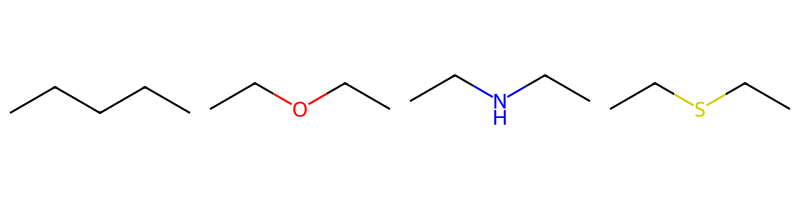

In [13]:
# 해당 SMILES 문자열로 분자들을 목록을 생성
smiles_list = ['CCCCC', 'CCOCC', 'CCNCC', 'CCSCC']
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]

# 해당 SMILES를 이미지로 시각화
MolsToGridImage(mols = mol_list,
                molsPerRow = 4
)

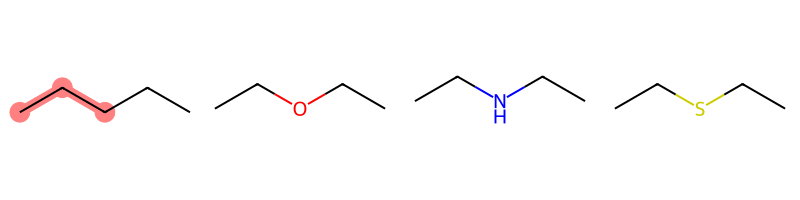

In [14]:
# 어떤 SMILES 문자열이 SMARTS 패턴 'CCC'와 일치하는지 확인
query = Chem.MolFromSmarts('CCC')
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols = mol_list,
                molsPerRow = 4,
                highlightAtomLists = match_list
)

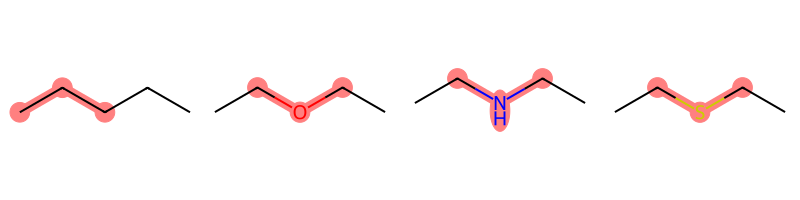

In [15]:
# 어떤 SMILES 문자열이 SMARTS 패턴 'C*C'와 일치하는지 확인
query = Chem.MolFromSmarts('C*C')
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols = mol_list,
                molsPerRow = 4,
                highlightAtomLists = match_list
)

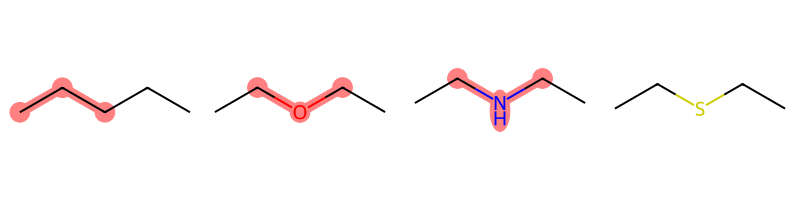

In [16]:
# 어떤 SMILES 문자열이 SMARTS 패턴 'C[C,O,N]C'와 일치하는지 확인
# 여기서 [C,O,N]는 두 개의 탄소 원자 사이에 탄소, 산소 혹은 질소 원자 하나가 결합되어 있다는 의미.
query = Chem.MolFromSmarts('C[C,O,N]C')
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols = mol_list,
                molsPerRow = 4,
                highlightAtomLists = match_list
)